<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/EDAs/EDA_kaggle_air_quality_in_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,482 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## pandas.concat()
- 중요점 : 같은 컬럼으로 붙임


In [15]:
import pandas as pd
# df_BRAZIL = pd.read_csv('BRAZIL.csv')
# df_ITALY = pd.read_csv('ITALY.csv')
df_USA = pd.read_csv('USA.csv')

# df_BRAZIL.shape, df_ITALY.shape, df_USA.shape

In [16]:
# df_merged = pd.concat(objs=[df_BRAZIL, df_ITALY, df_USA])
# df_merged.shape

In [17]:
# df_merged

In [18]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179365 entries, 0 to 179364
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      179365 non-null  object 
 1   Country   179365 non-null  object 
 2   City      179365 non-null  object 
 3   Specie    179365 non-null  object 
 4   count     179365 non-null  int64  
 5   min       179365 non-null  float64
 6   max       179365 non-null  float64
 7   median    179365 non-null  float64
 8   variance  179365 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 12.3+ MB


< Specie >
- Carbon Monoxide (CO) - 일산화탄소
- Dew - 이슬
- Humidity - 습도
- Nitrogen Dioxide (NO2) - 이산화질소
- Ozone (O3) - 오존
- Particulate Matter 10 (PM10) - 미세먼지 10
- Particulate Matter 2.5 (PM2.5) - 미세먼지 2.5
- Pressure - 압력(기압)
- Sulphur Dioxide (SO2) - 이산화황
- Temperature - 온도
- Wind Gusts - 돌풍
- Wind Speed - 풍속

In [19]:
df_USA['Specie'].unique()

array(['o3', 'no2', 'pressure', 'wind-speed', 'dew', 'co', 'pm10',
       'humidity', 'pm25', 'wind-gust', 'so2', 'temperature', 'wd',
       'precipitation'], dtype=object)

In [20]:
df_USA.sort_values('Date')

,Date,Country,City,Specie,count,min,max,median,variance
19618,01-01-2021,UNITED STATES,Portland,dew,13,6.6,8.0,7.0,2.46
131015,01-01-2021,UNITED STATES,San Antonio,wind-speed,115,1.1,11.3,5.9,56.37
178662,01-01-2021,UNITED STATES,Fort Worth,pressure,24,1002.7,1021.6,1014.8,400.27
31944,01-01-2021,UNITED STATES,Honolulu,pressure,72,1010.8,1020.6,1019.2,60.35
23144,01-01-2021,UNITED STATES,Boise,humidity,120,52.0,100.0,69.0,1964.13
...,...,...,...,...,...,...,...,...,...
135018,31-12-2020,UNITED STATES,Philadelphia,pressure,96,1011.1,1029.9,1018.4,240.35
4124,31-12-2020,UNITED STATES,Raleigh,wind-speed,11,0.1,2.5,0.8,6.04
87470,31-12-2020,UNITED STATES,San Jose,no2,63,1.9,29.7,12.1,534.68
5156,31-12-2020,UNITED STATES,Raleigh,pressure,72,1020.3,1024.5,1021.7,10.78


In [21]:
df_USA['Date'].value_counts()

09-03-2021    580
08-03-2021    577
29-04-2021    577
10-03-2021    577
18-05-2021    575
             ... 
29-10-2021    286
28-10-2021    265
27-10-2021    235
25-10-2021    225
26-10-2021    221
Name: Date, Length: 324, dtype: int64

In [ ]:
df_USA['City'].value_counts()  # Dallas

## DDA

- 제안 1: 공기 질 지표의 시간별 변화 분석
 + 문제 정의: 2020년부터 2021년까지 시간에 따른 공기 질 지표(AQI)의 변화를 분석합니다.
 + 배경: 이 분석을 통해 특정 시기에 공기 질이 악화되거나 개선되는 경향을 파악할 수 있습니다. 예를 들어, 계절적 변화나 특정 이벤트가 공기 질에 미치는 영향을 이해할 수 있습니다.


In [23]:
# Date => datetime 으로 변경
df_USA['Date_datetime'] = pd.to_datetime(df_USA['Date'], format='%d-%m-%Y')
df_USA['Date_datetime']

0        2021-06-13
1        2021-04-19
2        2021-06-24
3        2021-07-19
4        2021-09-25
            ...    
179360   2021-02-05
179361   2021-05-06
179362   2021-05-29
179363   2021-07-30
179364   2021-08-15
Name: Date_datetime, Length: 179365, dtype: datetime64[ns]

In [24]:
df_USA['Date_datetime_year'] = df_USA['Date_datetime'].dt.year
df_USA['Date_datetime_month'] = df_USA['Date_datetime'].dt.month
df_USA['Date_datetime_day'] = df_USA['Date_datetime'].dt.day
df_USA[:2]

,Date,Country,City,Specie,count,min,max,median,variance,Date_datetime,Date_datetime_year,Date_datetime_month,Date_datetime_day
0,13-06-2021,UNITED STATES,Oklahoma City,o3,48,8.0,45.6,26.4,1207.36,2021-06-13,2021,6,13
1,19-04-2021,UNITED STATES,Oklahoma City,o3,45,3.2,47.2,32.8,2046.93,2021-04-19,2021,4,19


In [32]:
USA_Dallas = "City == 'Dallas'"
condition_USA_co = "Specie == 'co'"
condition_USA_no2 = "Specie == 'no2'"
condition_USA_o3 = "Specie == 'o3'"
condition_USA_pm10 = "Specie == 'pm10'"
condition_USA_so2 = "Specie == 'so2'"

In [33]:
condition_USA_co = f'{USA_Dallas} and {condition_USA_co}'
condition_USA_no2 = f'{USA_Dallas} and {condition_USA_no2}'
condition_USA_o3 = f'{USA_Dallas} and {condition_USA_o3}'
condition_USA_pm10 = f'{USA_Dallas} and {condition_USA_pm10}'
condition_USA_so2 = f'{USA_Dallas} and {condition_USA_so2}'

df_USA_Dallas_co = df_USA.query(condition_USA_co)
df_USA_Dallas_no2 = df_USA.query(condition_USA_no2)
df_USA_Dallas_o3 = df_USA.query(condition_USA_o3)
df_USA_Dallas_pm10 = df_USA.query(condition_USA_pm10)
df_USA_Dallas_so2 = df_USA.query(condition_USA_so2)

### EDA
- 각 city 별/Specie 별/ 값 비교

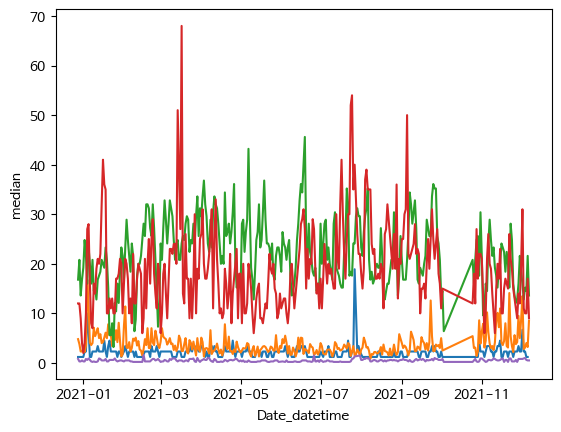

In [37]:
sns.lineplot(data=df_USA_Dallas_co, x='Date_datetime', y='median')
sns.lineplot(data=df_USA_Dallas_no2, x='Date_datetime', y='median')
sns.lineplot(data=df_USA_Dallas_o3, x='Date_datetime', y='median')
sns.lineplot(data=df_USA_Dallas_pm10, x='Date_datetime', y='median')
sns.lineplot(data=df_USA_Dallas_so2, x='Date_datetime', y='median')
plt.show()

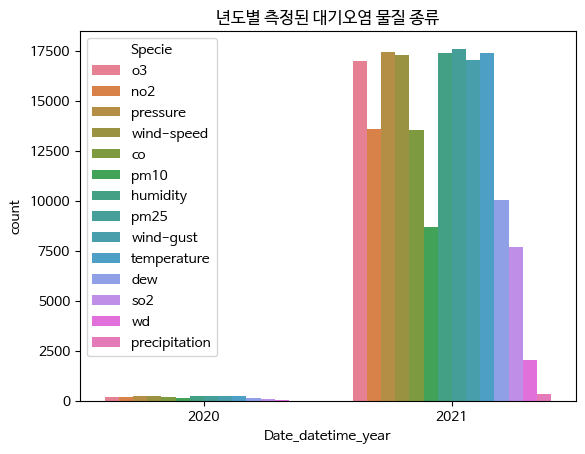

In [25]:
sns.countplot(data=df_USA, x='Date_datetime_year', hue='Specie')
plt.title('년도별 측정된 대기오염 물질 종류')
plt.show()

<Axes: xlabel='Date_datetime_month', ylabel='median'>

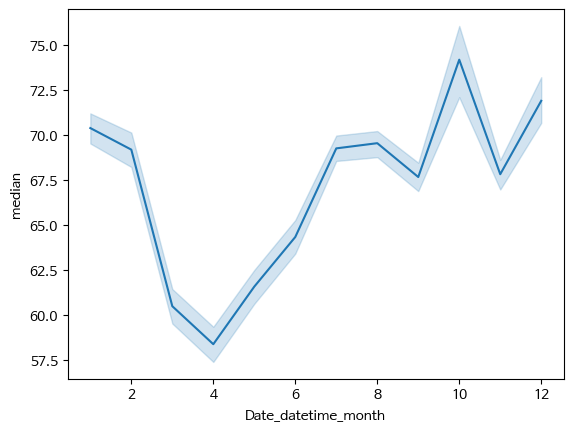

In [26]:
# 월별 습도 중앙값 분포
specie_humidity = df_USA.query('Specie == "humidity"')
sns.lineplot(data=specie_humidity, x='Date_datetime_month' ,y='median')

<Axes: xlabel='Date_datetime', ylabel='count'>

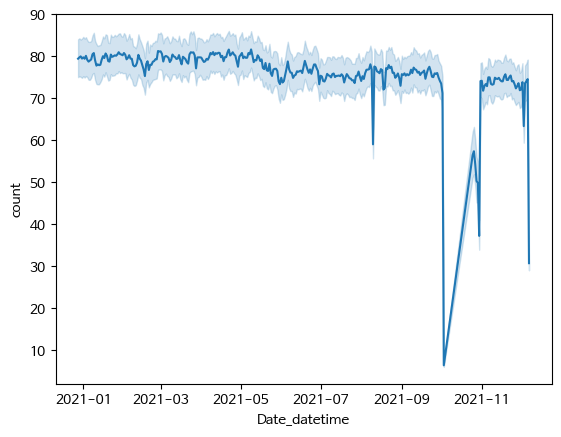

In [27]:
sns.lineplot(data=df_USA, x='Date_datetime', y='count')